In [4]:
import openslide
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [5]:
def overlay_mask_on_slide(slide, mask, center='radboud', alpha=0.8, max_size=(800, 800)):
    """Show a mask overlayed on a slide."""

    if center not in ['radboud', 'karolinska']:
        raise Exception("Unsupported palette, should be one of [radboud, karolinska].")

    full_size = slide.level_dimensions[1]
    full_mask = mask.level_dimensions[1]

    middle_page = 1  # Índice da página do meio (0-based)
    slide_data = slide.read_region((0, 0), middle_page, full_size)
    mask_data = mask.read_region((0, 0), middle_page, full_size)

    # slide_data = slide.read_region((0, 0), 0, slide.level_dimensions[0])
    # mask_data = mask.read_region((0,0), 0, mask.level_dimensions[0])

    print(slide.level_count - 1, slide.level_dimensions[-1])

    # Mask data is present in the R channel
    mask_data = mask_data.split()[0]

    # Create alpha mask
    alpha_int = int(round(255*alpha))
    if center == 'radboud':
        alpha_content = np.less(mask_data.split()[0], 2).astype('uint8') * alpha_int + (255 - alpha_int)
    elif center == 'karolinska':
        alpha_content = np.less(mask_data.split()[0], 1).astype('uint8') * alpha_int + (255 - alpha_int)

    alpha_content = PIL.Image.fromarray(alpha_content)
    preview_palette = np.zeros(shape=768, dtype=int)

    if center == 'radboud':
        # Mapping: {0: background, 1: stroma, 2: benign epithelium, 3: Gleason 3, 4: Gleason 4, 5: Gleason 5}
        preview_palette[0:18] = (np.array([0, 0, 0, 0.5, 0.5, 0.5, 0, 1, 0, 1, 1, 0.7, 1, 0.5, 0, 1, 0, 0]) * 255).astype(int)
    elif center == 'karolinska':
        # Mapping: {0: background, 1: benign, 2: cancer}
        preview_palette[0:9] = (np.array([0, 0, 0, 0, 1, 0, 1, 0, 0]) * 255).astype(int)

    mask_data.putpalette(data=preview_palette.tolist())
    mask_rgb = mask_data.convert(mode='RGB')

    overlayed_image = PIL.Image.composite(image1=slide_data, image2=mask_rgb, mask=alpha_content)
    # overlayed_image.thumbnail(size=max_size, resample=0)
    overlayed_image.save("xxxx.tiff", format="TIFF")

    display(overlayed_image)

2 (208, 1264)


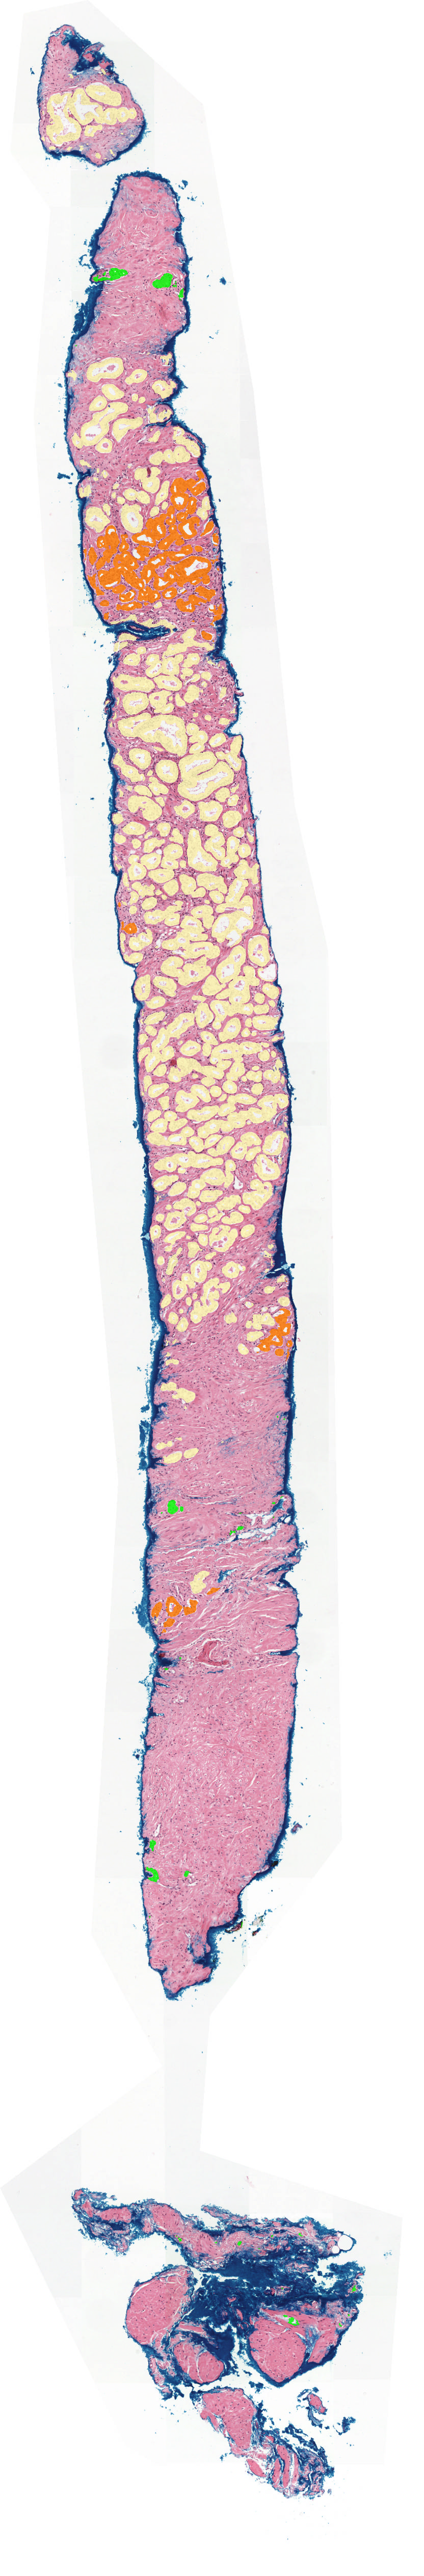

In [7]:
image_id = "images/08ab45297bfe652cc0397f4b37719ba1.tiff"
image_mask_id="images/08ab45297bfe652cc0397f4b37719ba1_mask.tiff"

slide = openslide.OpenSlide(image_id)
mask = openslide.OpenSlide(image_mask_id)

overlay_mask_on_slide(slide, mask, center='radboud')
slide.close()
mask.close()